In [1]:
import numpy as numpy
import pandas as pd

In [3]:
df = pd.read_csv('./datasets/spam.csv', encoding='latin1')

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

### Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 columns
df.drop(columns = {'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)
df.sample(5)

,v1,v2
4607,ham,We live in the next &lt;#&gt; mins
4838,ham,That's one of the issues but california is oka...
2316,ham,That's cause your old. I live to be high.
817,ham,Also are you bringing galileo or dobby
2342,spam,Double your mins & txts on Orange or 1/2 price...


In [10]:
#renaming
df.rename(columns={'v1':'target','v2':'text'}, inplace =True)
df.sample(5)

,target,text
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
4678,ham,Sry da..jst nw only i came to home..
4503,ham,She told to hr that he want posting in chennai...
900,ham,Probably money worries. Things are coming due ...
3658,ham,Wait.i will come out.. &lt;#&gt; min:)


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
#Encoding target values into numerical values(0-ham, 1-Spam)
df['target']= encoder.fit_transform(df['target'])

In [15]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
#duplicates
df.duplicated().sum()

403

In [19]:
#removing duplicates
df = df.drop_duplicates(keep="first")

In [20]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

### EDA

In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

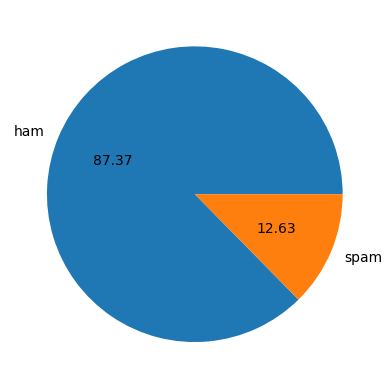

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.show()

In [25]:
#for imbalances in text
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
#num chars in text
df['num_chars']= df['text'].apply(len)

In [29]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
#num of words
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

In [31]:
#num of sentences
df["num_sent"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#Spam counts
df[df['target']==1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
#Ham counts
df[df['target']==0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

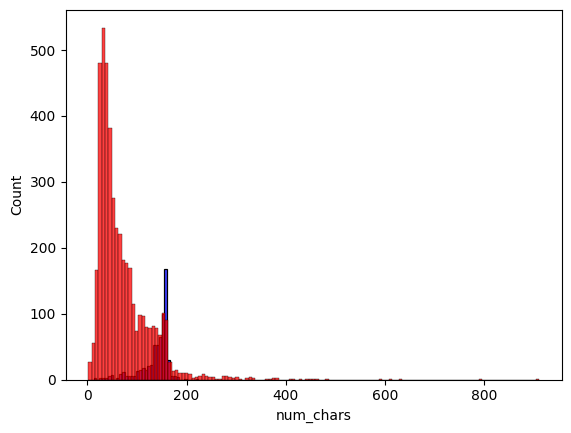

In [38]:
sns.histplot(df[df['target']==1]['num_chars'],color='blue')
sns.histplot(df[df['target']==0]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

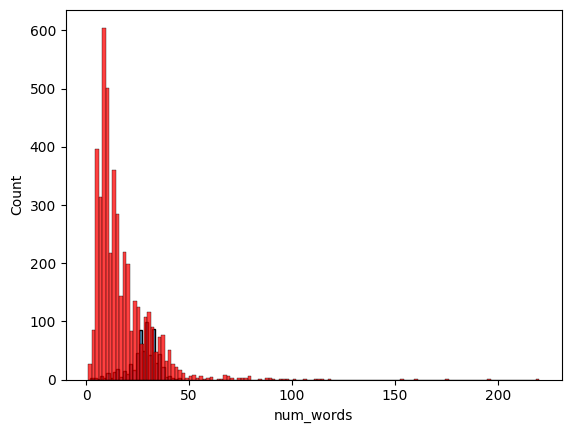

In [ ]:
sns.histplot(df[df['target']==1]['num_words'],kde=True,color='blue')
sns.histplot(df[df['target']==0]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

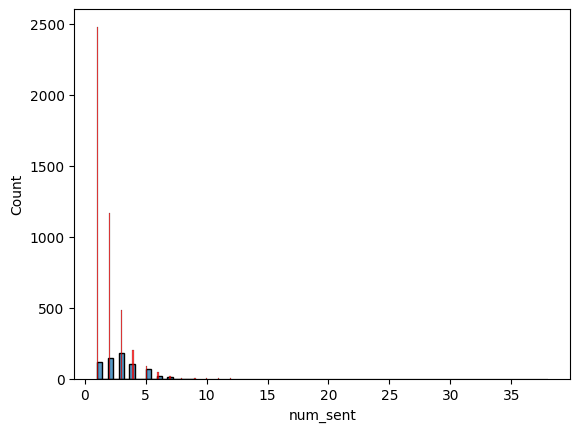

In [41]:
sns.histplot(df[df['target']==1]['num_sent'])
sns.histplot(df[df['target']==0]['num_sent'],color='red')

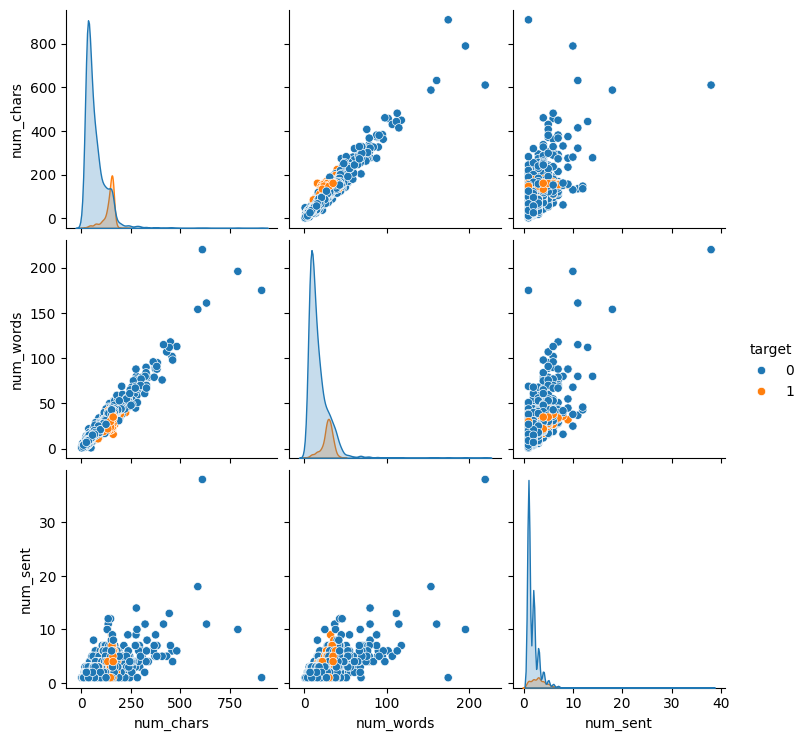

In [42]:
sns.pairplot(df,hue='target')

In [ ]:
df[['target','num_chars','num_words','num_sent']].corr()

Index(['target', 'text', 'num_chars', 'num_words', 'num_sent'], dtype='object')


### Data Preprocessing

In [ ]:
#preprocessing through lowercase, tokenisation, stopwords removal, punctuation removal, stemming

def transform_text()